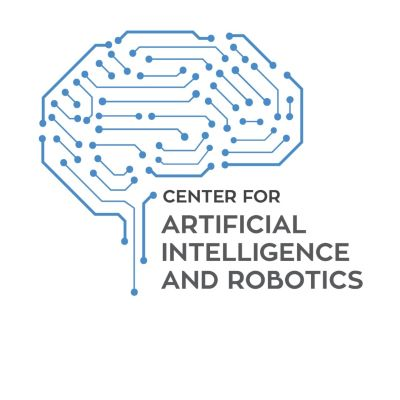

# K Nearest Neighbors Project 

## Import Libraries

<div>
Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

<div>
Load the desired dataset, take a quick look at it, and display its general and statistical information.

In [2]:
df = pd.read_csv('KNN_Project_Data')

In [3]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

<div>
Pay close attention to the range of different features!

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
df.describe()

XVPM         GWYH         TRAT         TLLZ         IGGA  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1055.071157   991.851567  1529.373525   495.107156   940.590072   
std     370.980193   392.278890   640.286092   142.789188   345.923136   
min      21.170000    21.720000    31.800000     8.450000    17.930000   
25%     767.413366   694.859326  1062.600806   401.788135   700.763295   
50%    1045.904805   978.355081  1522.507269   500.197421   939.348662   
75%    1326.065178  1275.528770  1991.128626   600.525709  1182.578166   
max    2117.000000  2172.000000  3180.000000   845.000000  1793.000000   

              HYKR         EDFS         GUUB         MGJM         JHZC  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1550.637455  1561.003252   561.346117  1089.067338  1452.521629   
std     493.491988   598.608517   247.357552   402.666953   568.132005   
min      27.930000    31.960000    13.520000    23.210000    30.890000   
25%    1219.267077  1132.097865   381.704293   801.849802  1059.499689   
50%    1564.996551  1565.882879   540.420379  1099.087954  1441.554053   
75%    1891.937040  1981.739411   725.762027  1369.923665  1864.405512   
max    2793.000000  3196.000000  1352.000000  2321.000000  3089.000000   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

## Exploratory Data Analysis (EDA)

<div style="font-size: 14px; font-weight: 500;">
    Now let's explore the dataset a bit to see what information we can uncover.
</div>

<div>
Plot a pair plot by separating the different classes of the target class.

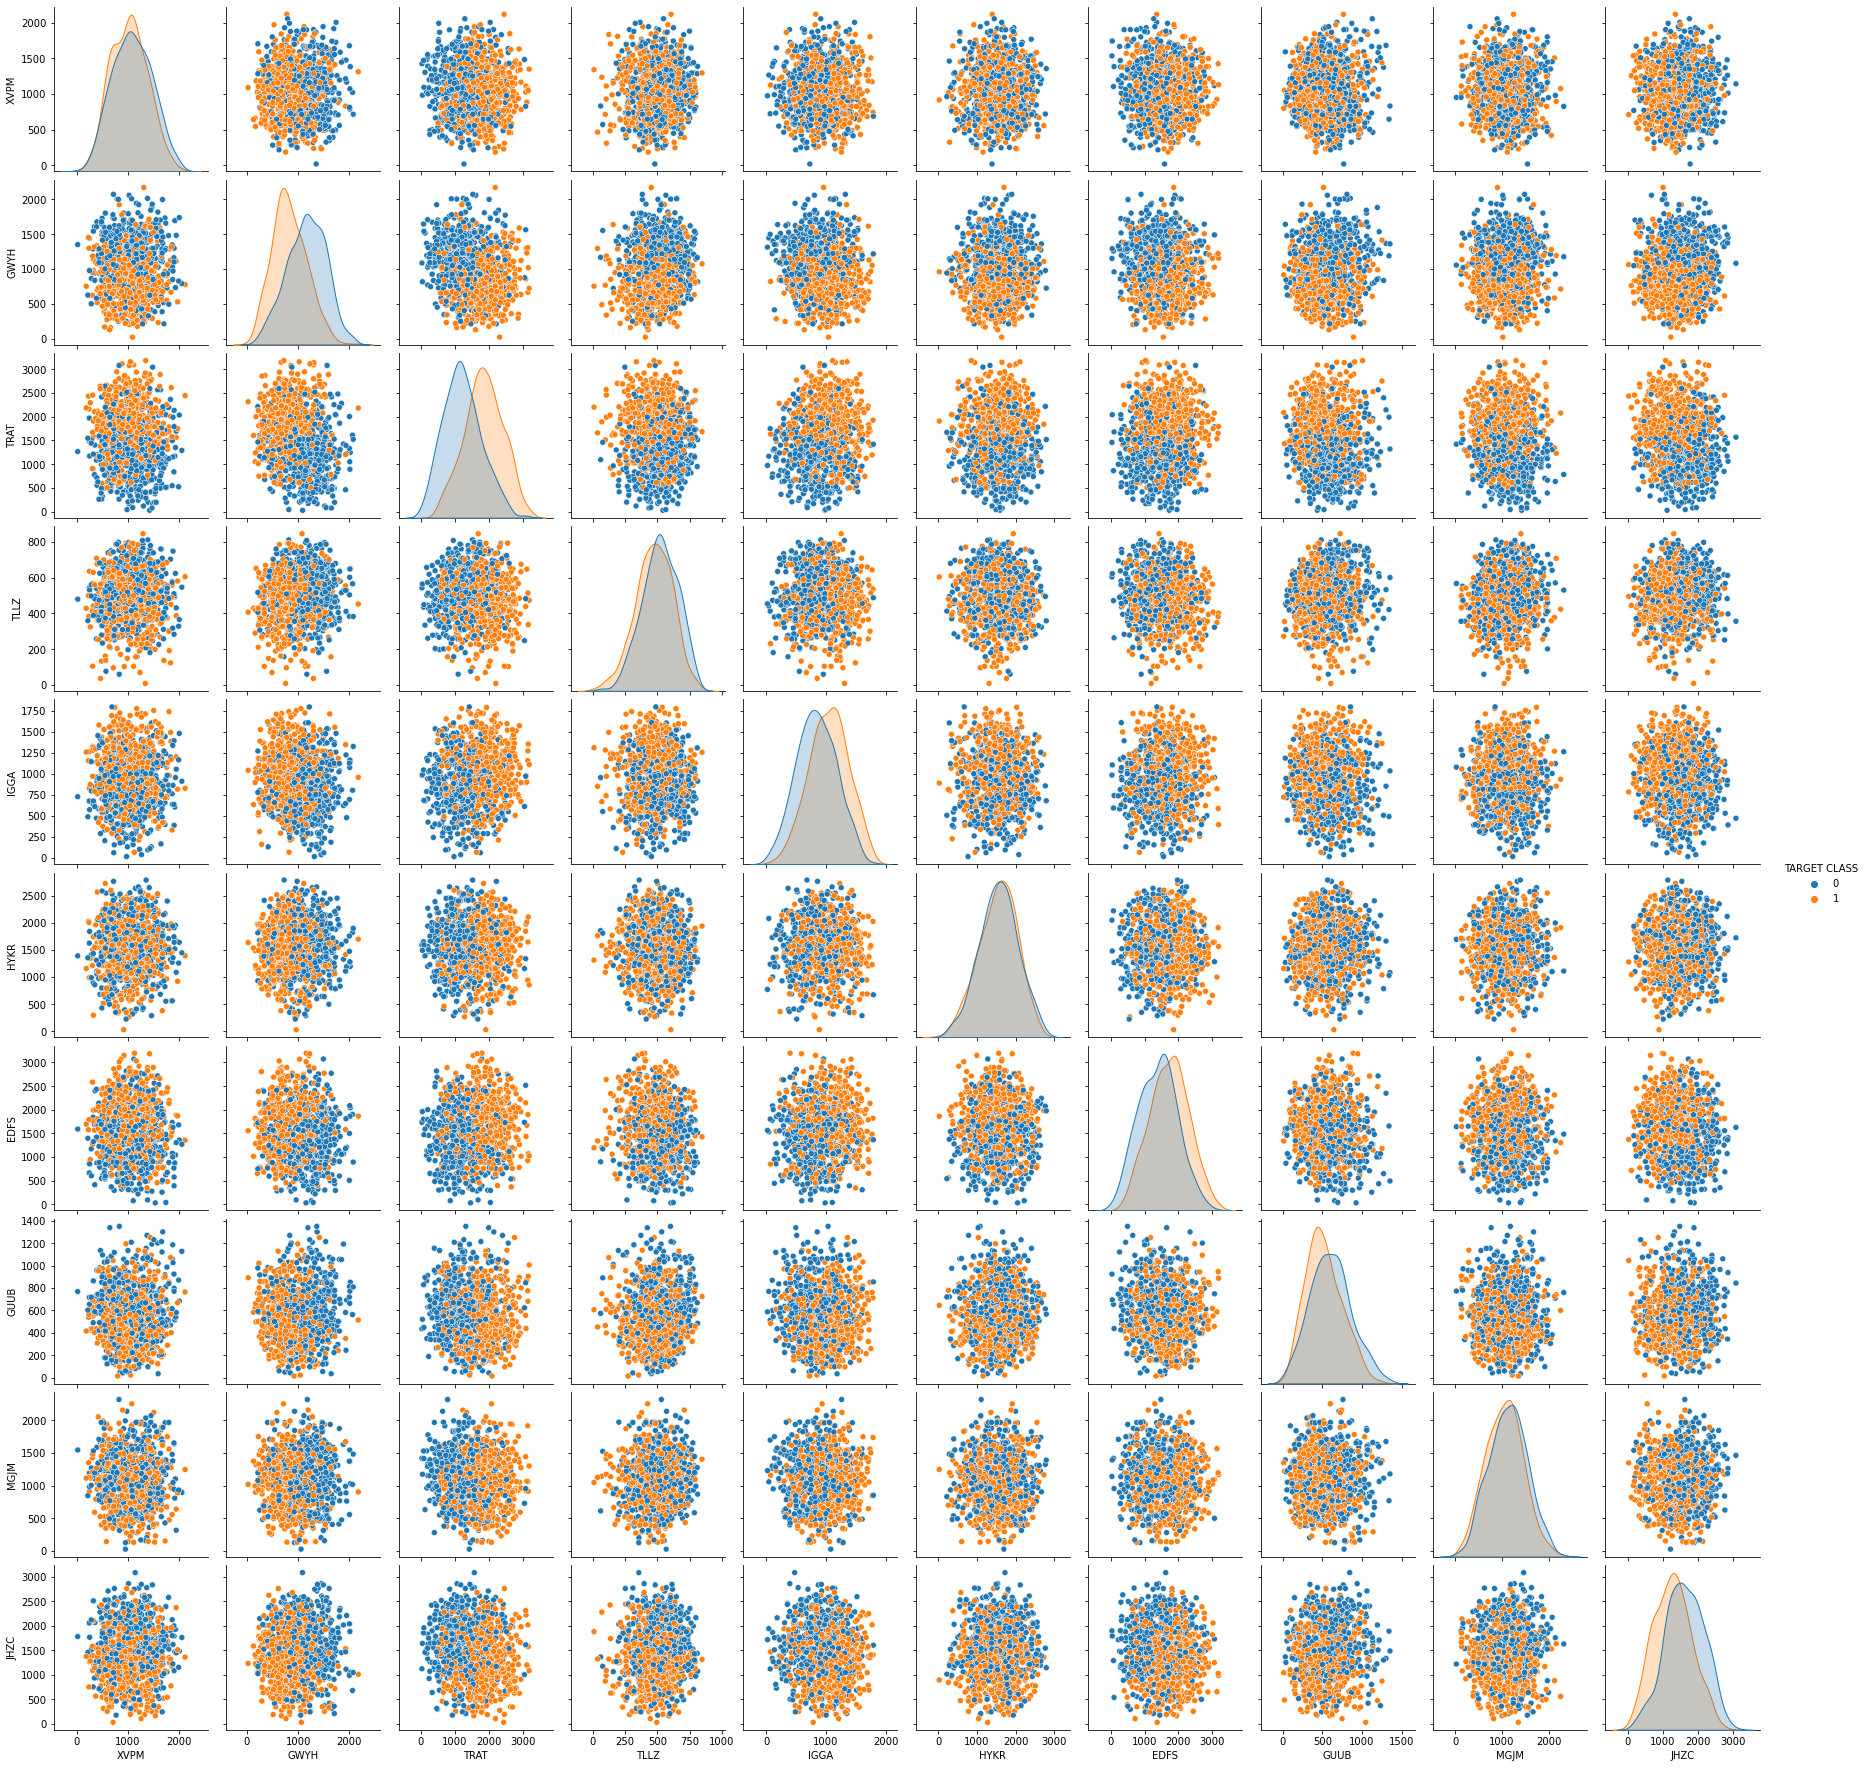

In [6]:
sns.pairplot(data=df, hue='TARGET CLASS')

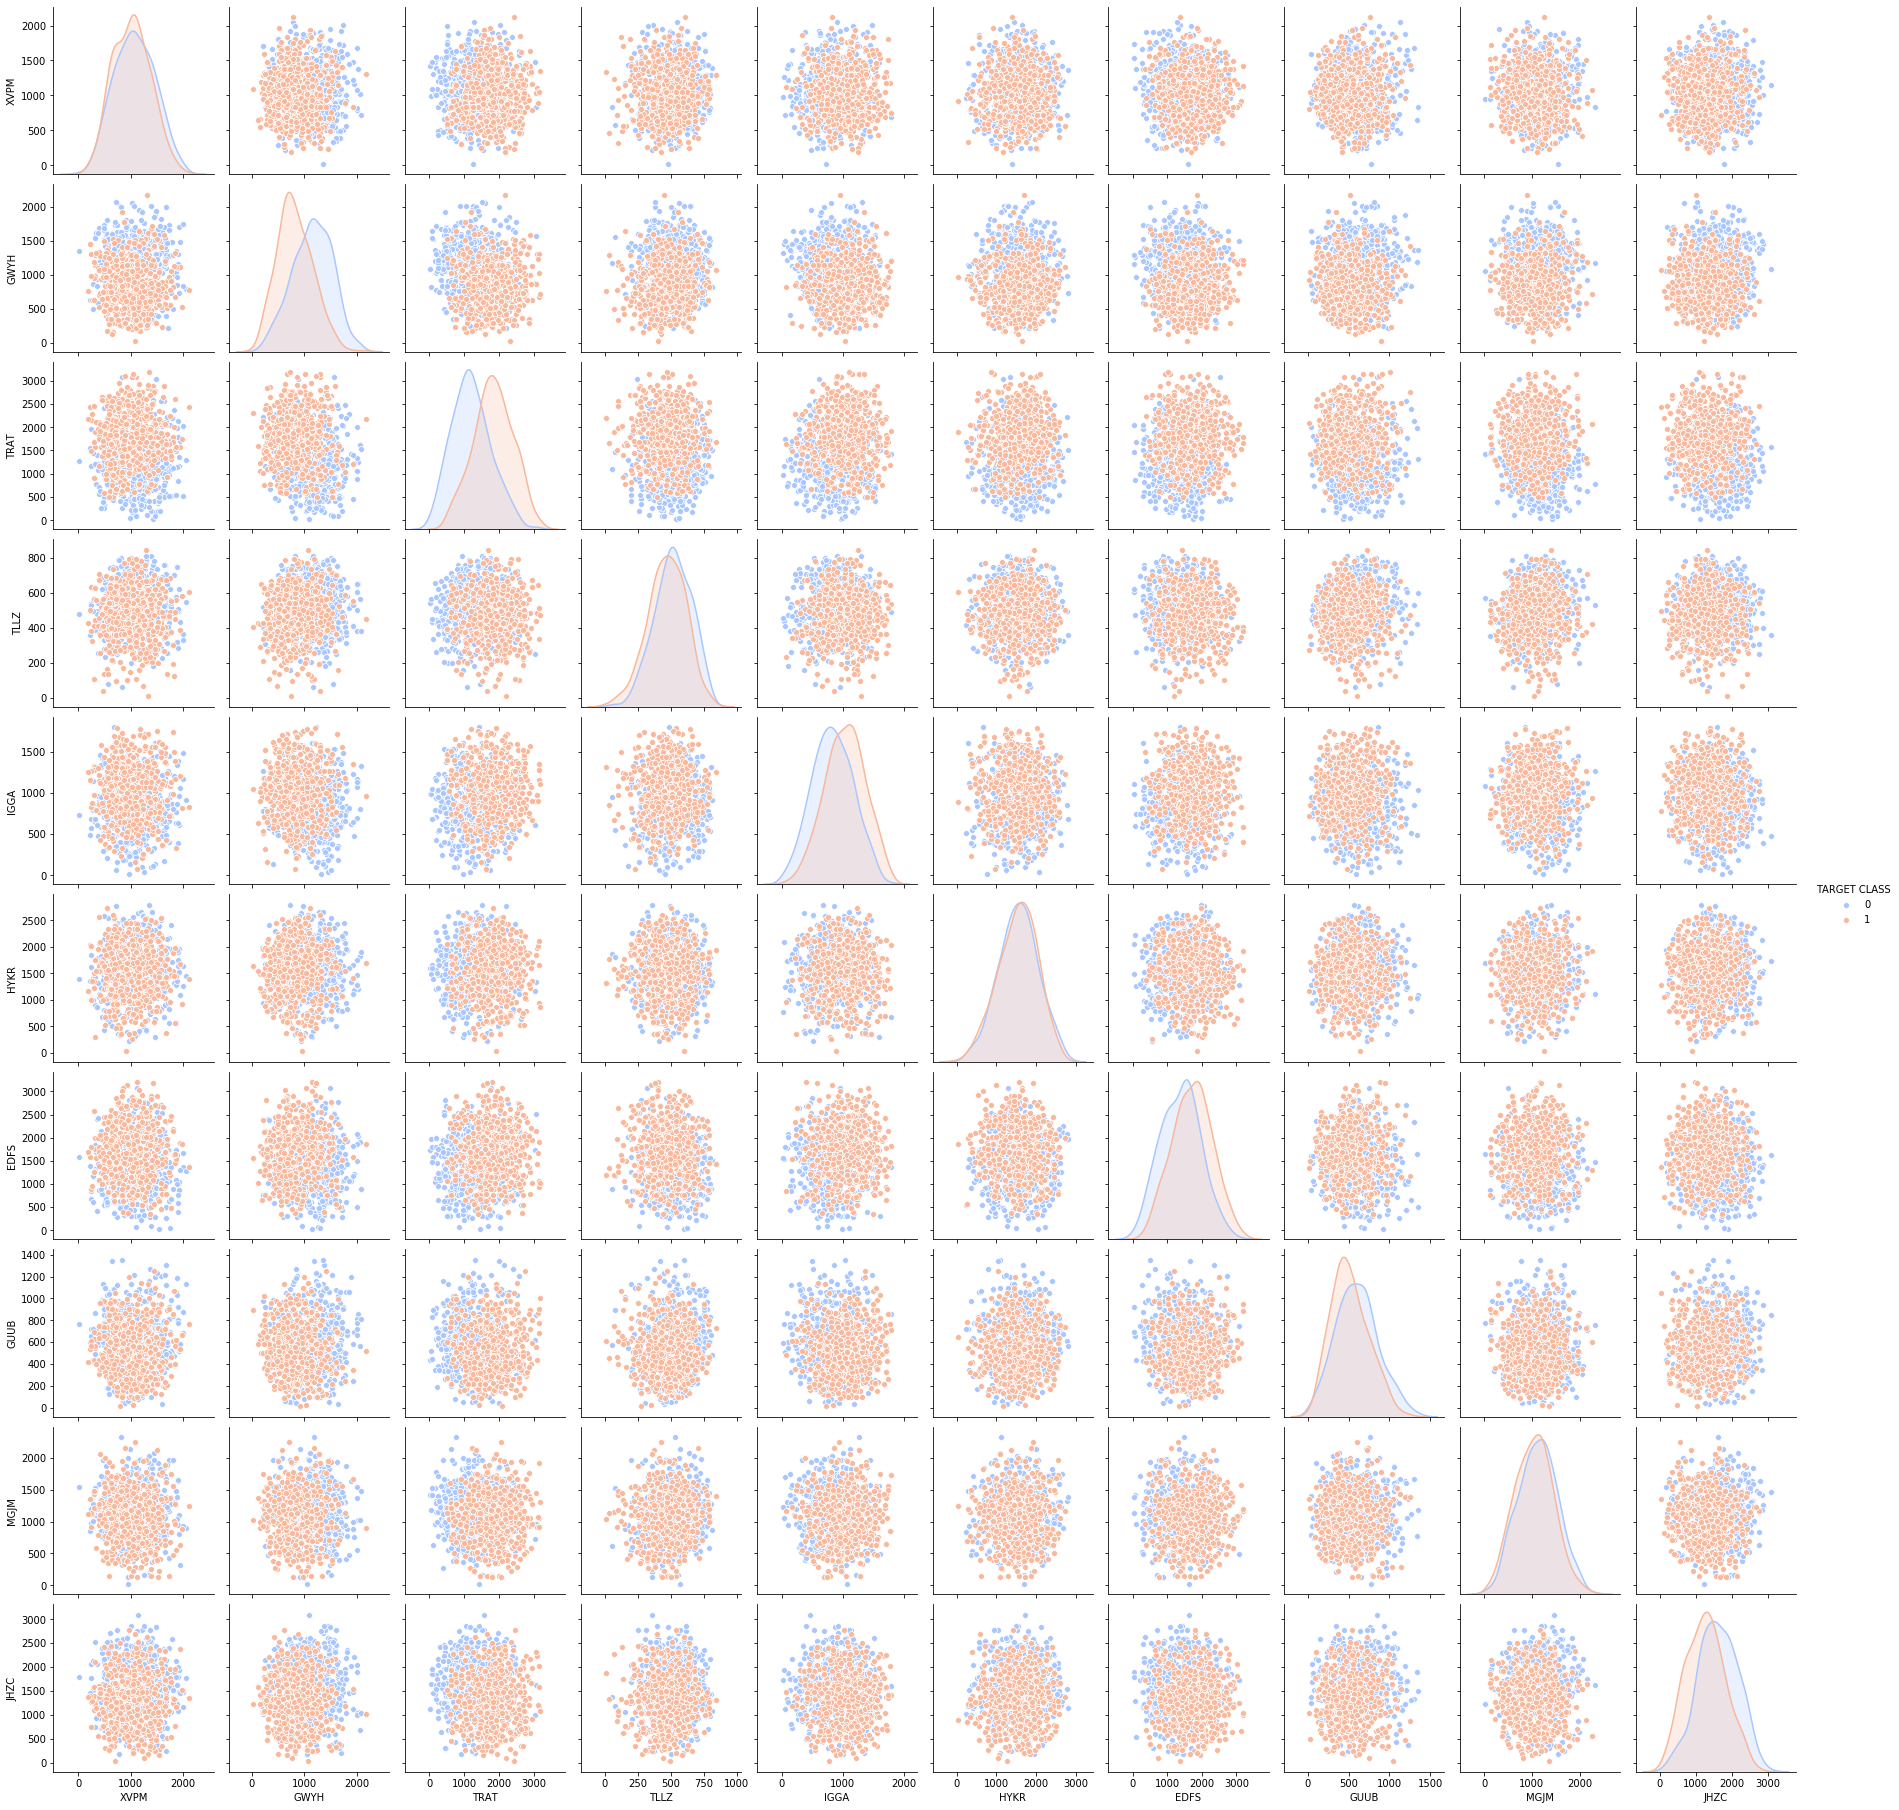

# Standardize the Variables

<div>
Since our algorithm is distance-based, and unscaled features can lead to incorrect distance calculations, we need to scale the data. An example of this error is when a data point moves back by 0.8 in a feature scaled between 0 and 1, it appears much farther compared to another data point that moves back by 8 in a feature scaled between 1 and 100. However, in mathematical distance calculations, 8 is greater than 0.8, which can mislead the model. Therefore, the features must be scaled.

<div>
Import the StandardScaler method from the preprocessing module of the sklearn library.

In [7]:
from sklearn.preprocessing import StandardScaler

<div>
Create an object from this class and name it scaler.

In [8]:
scaler = StandardScaler()

<div>
Fit your scaler on the features to calculate the range of all features.

In [9]:
X = df.drop('TARGET CLASS', axis=1)  # Features
y = df['TARGET CLASS']               # Target

In [10]:
scaler.fit(X)

StandardScaler()

<div>
Now apply the trained scaler to the data to scale the feature ranges.

In [11]:
X_scaled = scaler.transform(X)

<div>
Insert the scaled data into a DataFrame and display it to ensure the features are scaled.

In [12]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [13]:
X_scaled_df.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [14]:
print("Means after scaling:\n", X_scaled_df.mean())
print("Standard deviations after scaling:\n", X_scaled_df.std())

Means after scaling:
 XVPM    1.743050e-17
GWYH    1.844080e-16
TRAT    3.064216e-17
TLLZ    1.534328e-16
IGGA   -1.423306e-16
HYKR   -2.751133e-16
EDFS   -1.726397e-16
GUUB   -6.905587e-17
MGJM   -5.173639e-16
JHZC   -1.110223e-19
dtype: float64
Standard deviations after scaling:
 XVPM    1.0005
GWYH    1.0005
TRAT    1.0005
TLLZ    1.0005
IGGA    1.0005
HYKR    1.0005
EDFS    1.0005
GUUB    1.0005
MGJM    1.0005
JHZC    1.0005
dtype: float64


<div>
Pay close attention again to the range of different features!

In [15]:
X_scaled_df.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

<div>
Split your data into training and testing sets.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, random_state=42, test_size=.2)

# Using KNN

<div>
Import KNeighborsClassifier from skleanr library

In [18]:
from sklearn.neighbors import KNeighborsClassifier

<div>
Create a model from this class with the number of neighbors set to 1.

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=1)

<div>
Fit the model to our data to train it.

In [20]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations

Predict the classes of the test data and evaluate the predictions using three metrics: score, confusion matrix, and classification report.

In [21]:
predictions = knn_model.predict(X_test)

In [22]:
predictions.shape

(200,)

In [23]:
y_test.shape

(200,)

In [24]:
print(f"the type of predictions is {type(predictions)}")
print(f"the type of y test is {type(y_test)}")

the type of predictions is <class 'numpy.ndarray'>
the type of y test is <class 'pandas.core.series.Series'>


In [25]:
knn_model.score(X_test, y_test)

0.755

0.72


### Confusion matirx

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
cm = confusion_matrix(y_test, predictions)

In [28]:
cm

array([[76, 24],
       [25, 75]], dtype=int64)

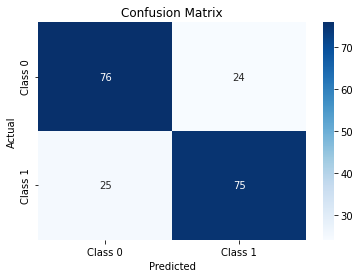

In [29]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[[109  43]
 [ 41 107]]


### classification report

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       100
           1       0.76      0.75      0.75       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



<div>
Well, we can see that the result wasn't very impressive, and it seems that having 1 neighbor isn't sufficient for making decisions about the data's class. We'll plot the error rate for different numbers of neighbors.

<div>
In this section, we need to write an inequality that returns 1 for every instance where the model incorrectly predicts the class. Finally, we'll take the average of these 1s, giving us a measure of the number of incorrect predictions—the lower this number, the better.

In [31]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [32]:
predictions != y_test

521    False
737     True
740    False
660     True
411    False
       ...  
408    False
332     True
208     True
613    False
78     False
Name: TARGET CLASS, Length: 200, dtype: bool

Text(0, 0.5, 'Error Rate')

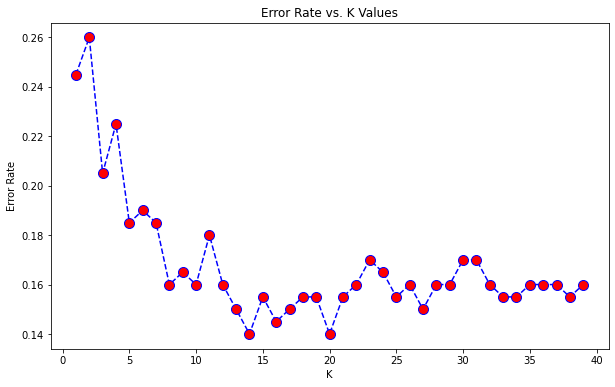

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', ls='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')

<div>
It seems that the lowest error and incorrect predictions occur when the class of the data is predicted based on the average of its 30 nearest neighbors. We'll make the prediction again using this number of neighbors and evaluate it using the metrics we have.

In [34]:
new_knn_model = KNeighborsClassifier(n_neighbors=20)

In [35]:
new_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [36]:
new_predictions = new_knn_model.predict(X_test)

In [37]:
new_knn_model.score(X_test, y_test)

0.86

### Confusion Matrix

In [38]:
new_cm = confusion_matrix(y_test, new_predictions)

In [39]:
new_cm

array([[89, 11],
       [17, 83]], dtype=int64)

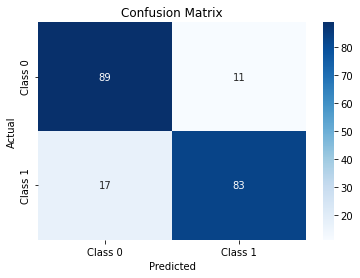

In [40]:
plt.figure(figsize=(6, 4))
sns.heatmap(new_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [41]:
print(classification_report(y_test, new_predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       100
           1       0.88      0.83      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



<hr style="height:1.5px;border-width:0;color:black;background-color:black">

# Improving the Performance

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [55]:
def best_n_neighbors(X, y, min_neighbors=1, max_neighbors=30):
    """
    Function to find the best number of neighbors for KNN by evaluating accuracy
    over a range of neighbor values using cross-validation.

    Args:
    - X: Feature matrix
    - y: Target variable
    - min_neighbors: Minimum number of neighbors to test
    - max_neighbors: Maximum number of neighbors to test

    Returns:
    - best_n: The best number of neighbors based on cross-validation scores
    """
    mean_scores = []
    
    for n in range(min_neighbors, max_neighbors + 1):
        knn_model = KNeighborsClassifier(n_neighbors=n)
        scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
        mean_scores.append(scores.mean())
    
    best_n = np.argmax(mean_scores) + min_neighbors  # Adding min_neighbors back to get the actual number
    print(f"Best number of neighbors: {best_n} with an average cross-validation score of {mean_scores[best_n - min_neighbors]:.4f}")
    
    return best_n

In [63]:
best_n = best_n_neighbors(X_scaled, y, min_neighbors=1, max_neighbors=30)

Best number of neighbors: 28 with an average cross-validation score of 0.8310


In [57]:
def knn_model_pipeline(X, y, n_neighbors=5, test_size=0.2, random_state=42):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)

    # Make predictions
    predictions = knn_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")

# Applying PCA

In [64]:
from sklearn.decomposition import PCA

In [65]:
def knn_model_pipeline(X, y, n_neighbors=5, test_size=0.2, random_state=42, apply_pca=False, variance_threshold=0.95):
    """
    KNN model pipeline function that includes an option to apply PCA.

    Args:
    - X: Feature matrix
    - y: Target variable
    - n_neighbors: Number of neighbors for KNN (default=5)
    - test_size: Proportion of data to be used for testing (default=0.2)
    - random_state: Random state for reproducibility (default=42)
    - apply_pca: Whether to apply PCA (default=False)
    - variance_threshold: The amount of variance to retain when applying PCA (default=0.95)

    Prints evaluation metrics: accuracy, confusion matrix, classification report
    """
    # Optional: Apply PCA if desired
    if apply_pca:
        pca = PCA(n_components=variance_threshold)
        X = pca.fit_transform(X)
        print(f"Reduced number of features after PCA: {X.shape[1]}")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)

    # Make predictions
    predictions = knn_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")

## With PCA

In [66]:
knn_model_pipeline(X_scaled, y, n_neighbors=20, apply_pca=True)

Reduced number of features after PCA: 10
Accuracy: 0.86
Confusion Matrix:
[[89 11]
 [17 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       100
           1       0.88      0.83      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



## Without PCA

In [69]:
knn_model_pipeline(X_scaled, y, n_neighbors=20, apply_pca=False)

Accuracy: 0.86
Confusion Matrix:
[[89 11]
 [17 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       100
           1       0.88      0.83      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



<div>

## Conclusion

<div style="font-size:16px;">
    as one can see from the results, the data is already well-scaled and relatively low-dimensional, meaning reducing dimensions further didn't add value.

---

# Fine-Tune Other Hyperparameters of KNN

In [78]:
def knn_model_pipeline(X, y, n_neighbors=5, test_size=0.2, random_state=42, metric='euclidean', weights='uniform'):
    """
    KNN model pipeline function that includes distance metric and weighting options.
    
    Args:
    - X: Feature matrix
    - y: Target variable
    - n_neighbors: Number of neighbors for KNN (default=5)
    - test_size: Proportion of data to be used for testing (default=0.2)
    - random_state: Random state for reproducibility (default=42)
    - metric: Distance metric to use (default='euclidean')
    - weights: Weight function to use (default='uniform')

    Prints evaluation metrics: accuracy, confusion matrix, classification report
    """
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

    # Initialize and train the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights, p=3)
    knn_model.fit(X_train, y_train)

    # Make predictions
    predictions = knn_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")

In [74]:
knn_model_pipeline(X_scaled_df, y, n_neighbors=best_n, metric='manhattan', weights='distance')

Accuracy: 0.855
Confusion Matrix:
[[86 14]
 [15 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       100
           1       0.86      0.85      0.85       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



In [80]:
knn_model_pipeline(X_scaled_df, y, n_neighbors=best_n, metric='minkowski', weights='distance')

Accuracy: 0.85
Confusion Matrix:
[[87 13]
 [17 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       100
           1       0.86      0.83      0.85       100

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



## Conclusion

<div style="font-size:16px;">
    The features might be already well-separated and do not benefit significantly from different distance metrics. In this case, KNN might already be making accurate predictions with the default Euclidean distance and uniform weighting.

---

# Feature Engineering

## Correlation Analysis

In [81]:
correlation_matrix = df.corr()
print(correlation_matrix['TARGET CLASS'].sort_values(ascending=False))

TARGET CLASS    1.000000
TRAT            0.489347
IGGA            0.295390
EDFS            0.281607
HYKR           -0.015266
XVPM           -0.079896
MGJM           -0.098887
TLLZ           -0.172029
GUUB           -0.174496
JHZC           -0.301725
GWYH           -0.416168
Name: TARGET CLASS, dtype: float64


## Variance Analysis

In [82]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)  # Remove features with low variance
X_high_variance = selector.fit_transform(X_scaled)
X_high_variance

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])